In [315]:
# Creating our data for the ABC Regression Task

# Import required packages

import pandas as pd

In [317]:
# Import the data

loyalty_scores = pd.read_excel(r"C:\Users\agran\OneDrive\Desktop\DataScienceInfinity\Python-Data Science\ABTesting\grocery_database.xlsx", sheet_name="loyalty_scores")
customer_details = pd.read_excel(r"C:\Users\agran\OneDrive\Desktop\DataScienceInfinity\Python-Data Science\ABTesting\grocery_database.xlsx", sheet_name = "customer_details")
transactions = pd.read_excel(r"C:\Users\agran\OneDrive\Desktop\DataScienceInfinity\Python-Data Science\ABTesting\grocery_database.xlsx", sheet_name = "transactions")

In [318]:
loyalty_scores

,customer_id,customer_loyalty_score
0,104,0.587
1,69,0.156
2,525,0.959
3,181,0.418
4,796,0.570
...,...,...
395,705,0.637
396,864,0.657
397,346,0.410
398,511,0.687


In [321]:
customer_details

,customer_id,distance_from_store,gender,credit_score
0,74,3.38,F,0.59
1,524,4.76,F,0.52
2,607,4.45,F,0.49
3,343,0.91,M,0.54
4,322,3.02,F,0.63
...,...,...,...,...
865,372,4.38,F,0.50
866,104,2.36,F,0.63
867,393,1.87,M,0.59
868,373,0.21,M,0.47


In [323]:
transactions

,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost
0,1,2020-04-10,435657533999,3,7,19.16
1,1,2020-04-10,435657533999,2,5,7.71
2,1,2020-06-02,436189770685,4,4,26.97
3,1,2020-06-02,436189770685,1,2,38.52
4,1,2020-06-10,436265380298,4,4,22.13
...,...,...,...,...,...,...
38501,870,2020-09-23,437316479610,5,4,51.61
38502,870,2020-09-23,437316479610,2,15,33.77
38503,870,2020-09-30,437385547544,5,3,23.46
38504,870,2020-09-30,437385547544,1,1,18.52


In [325]:
# Creating the customer level dataset

data_for_regression = pd.merge(customer_details, loyalty_scores, how = "left", on = "customer_id")

sales_summary = transactions.groupby("customer_id").agg({"sales_cost": "sum", "num_items": "sum",
                                                         "transaction_id": "count",
                                                         "product_area_id": "nunique"}).reset_index()
sales_summary.columns = ["customer_id", "total_sales", "total_items", "transaction_count", "product_area_count"]

sales_summary["average_basket_value"] = sales_summary["total_sales"] / sales_summary["transaction_count"]
data_for_regression = pd.merge(data_for_regression, sales_summary, how = "inner", on = "customer_id")

regression_modelling = data_for_regression.loc[data_for_regression["customer_loyalty_score"].notna()]
regression_scoring = data_for_regression.loc[data_for_regression["customer_loyalty_score"].isna()]
regression_scoring = regression_scoring.copy()
regression_scoring.drop(["customer_loyalty_score"], axis = 1, inplace = True)


In [327]:
regression_scoring

,customer_id,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
6,1,4.78,F,0.66,3980.49,424,51,5,78.048824
7,120,3.49,F,0.38,2887.20,253,45,5,64.160000
8,52,14.91,F,0.68,3342.75,335,47,5,71.122340
10,435,0.25,M,0.62,2326.71,267,48,5,48.473125
12,679,4.74,F,0.58,3448.59,370,49,5,70.379388
...,...,...,...,...,...,...,...,...,...
860,711,400.97,F,0.54,4072.86,346,45,5,90.508000
861,309,0.32,M,0.38,3097.99,281,51,5,60.744902
863,765,1.62,M,0.63,3736.02,250,46,5,81.217826
864,466,4.36,F,0.54,4407.12,354,47,5,93.768511


In [329]:
regression_modelling

,customer_id,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,74,3.38,F,0.59,0.263,2563.71,297,44,5,58.266136
1,524,4.76,F,0.52,0.298,2996.02,357,49,5,61.143265
2,607,4.45,F,0.49,0.337,2853.82,350,49,5,58.241224
3,343,0.91,M,0.54,0.873,2388.31,272,54,5,44.227963
4,322,3.02,F,0.63,0.350,2401.64,278,50,5,48.032800
...,...,...,...,...,...,...,...,...,...,...
862,4,2.14,M,0.64,0.564,3499.39,278,47,5,74.455106
865,372,4.38,F,0.50,0.321,3423.01,338,49,5,69.857347
866,104,2.36,F,0.63,0.587,3648.08,280,49,5,74.450612
868,373,0.21,M,0.47,0.972,3303.80,264,51,5,64.780392


In [331]:
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.inspection import permutation_importance

In [333]:
regression_modelling.columns

Index(['customer_id', 'distance_from_store', 'gender', 'credit_score',
       'customer_loyalty_score', 'total_sales', 'total_items',
       'transaction_count', 'product_area_count', 'average_basket_value'],
      dtype='object')

In [335]:
data_for_model = regression_modelling

In [337]:

data_for_model.columns

Index(['customer_id', 'distance_from_store', 'gender', 'credit_score',
       'customer_loyalty_score', 'total_sales', 'total_items',
       'transaction_count', 'product_area_count', 'average_basket_value'],
      dtype='object')

In [339]:
# Shuffle data
data_for_model = shuffle(data_for_model, random_state = 42)

In [341]:
# Deal with missing values

data_for_model.isna().sum()
data_for_model.dropna(how = "any", inplace = True)

In [343]:
# Split Input Variable and Output Variable

X = data_for_model.drop(["customer_loyalty_score"], axis = 1)
y = data_for_model["customer_loyalty_score"]

In [347]:
# Split our Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [349]:
# Deal with Categorical Variables
categorical_vars = ["gender"]
one_hot_encoder = OneHotEncoder(sparse_output = False, drop = "first")

X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars])

encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)

X_train_encoded = pd.DataFrame(X_train_encoded, columns = encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop = True), X_train_encoded.reset_index(drop = True)], axis = 1)
X_train.drop(categorical_vars, axis  = 1, inplace = True)

X_test_encoded = pd.DataFrame(X_test_encoded, columns = encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop= True), X_test_encoded.reset_index(drop = True)], axis = 1)
X_test.drop(categorical_vars, axis = 1, inplace = True)

In [351]:
# Model Training

regressor = RandomForestRegressor(random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [353]:
# Model Assessment

# Predict on test set

y_pred = regressor.predict(X_test)

In [355]:
# Calculate R-squared

r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.957777109076172


In [357]:
# Cross Validation

cv = KFold(n_splits = 4, shuffle = True, random_state = 42)
cv_scores = cross_val_score(regressor, X_train, y_train, cv = cv, scoring = "r2")
cv_scores.mean()

0.9211684688347633

In [359]:
# Calculate Adjusted R-Squared

num_data_points, num_input_vars = X_test.shape
adjusted_r_squared = 1 - (1- r_squared) * (num_data_points - 1) / (num_data_points - num_input_vars - 1)
print(adjusted_r_squared)

0.9522697754774118


In [295]:
# Feature Importance

feature_importance = pd.DataFrame(regressor.feature_importances_)
feature_names = pd.DataFrame(X.columns)
feature_importance_summary = pd.concat([feature_names, feature_importance], axis = 1)
feature_importance_summary.columns = ["input_variable", "feature_importance"]
feature_importance_summary.sort_values(by = "feature_importance", inplace = True)

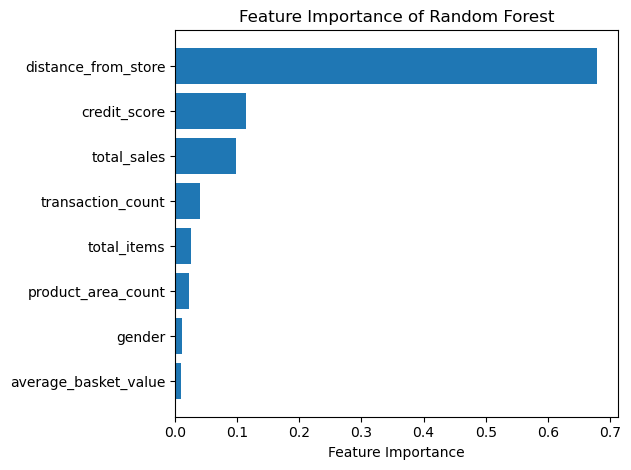

In [361]:
plt.barh(feature_importance_summary["input_variable"], feature_importance_summary["feature_importance"])
plt.title("Feature Importance of Random Forest")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


In [363]:
# Permutation Importance

result = permutation_importance(regressor, X_test, y_test, n_repeats = 10, random_state = 42)

permutation_importance = pd.DataFrame(result["importances_mean"])
feature_names = pd.DataFrame(X.columns)
permutation_importance_summary = pd.concat([feature_names, permutation_importance], axis = 1)
permutation_importance_summary.columns = ["input_variable", "permutation_importance"]
permutation_importance_summary.sort_values(by = "permutation_importance", inplace = True)

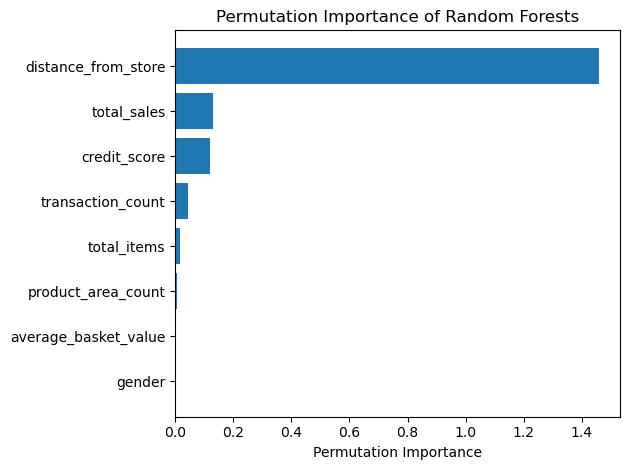

In [238]:
plt.barh(permutation_importance_summary["input_variable"], permutation_importance_summary["permutation_importance"])
plt.title("Permutation Importance of Random Forests")
plt.xlabel("Permutation Importance")
plt.tight_layout()
plt.show()


In [365]:
# Predictions under the hood

y_pred[0]
new_data = [X_test.iloc[0]]
regressor.estimators_

predictions = []
tree_count = 0
for tree in regressor.estimators_:
    prediction = tree.predict(new_data)[0]
    predictions.append(prediction)
    tree_count += 1
print(predictions)
sum(predictions) / tree_count

[0.201, 0.667, 0.117, 0.12, 0.177, 0.302, 0.17, 0.201, 0.201, 0.17, 0.17, 0.12, 0.234, 0.17, 0.147, 0.526, 0.268, 0.234, 0.268, 0.234, 0.234, 0.17, 0.201, 0.234, 0.268, 0.12, 0.314, 0.17, 0.234, 0.352, 0.268, 0.17, 0.234, 0.17, 0.116, 0.117, 0.201, 0.203, 0.234, 0.104, 0.12, 0.313, 0.234, 0.201, 0.17, 0.17, 0.234, 0.17, 0.17, 0.449, 0.557, 0.177, 0.448, 0.12, 0.17, 0.12, 0.448, 0.17, 0.174, 0.201, 0.147, 0.234, 0.448, 0.314, 0.234, 0.17, 0.234, 0.174, 0.17, 0.147, 0.17, 0.344, 0.17, 0.221, 0.177, 0.234, 0.17, 0.203, 0.352, 0.174, 0.314, 0.268, 0.234, 0.058, 0.17, 0.17, 0.317, 0.12, 0.174, 0.201, 0.35200000000000004, 0.234, 0.20299999999999999, 0.506, 0.20099999999999998, 0.201, 0.17, 0.17, 0.234, 0.201]


0.2261200000000002

In [367]:
# Loyalty score prediction
to_be_scored = regression_scoring

In [369]:
# Drop missing values

to_be_scored.dropna(how = "any", inplace = True)

In [371]:
# Apply one hot encoding

categorical_vars = ["gender"]
encoder_vars_array = one_hot_encoder.transform(to_be_scored[categorical_vars])
encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)
encoder_vars_df = pd.DataFrame(encoder_vars_array, columns = encoder_feature_names)
to_be_scored = pd.concat([to_be_scored.reset_index(drop=True), encoder_vars_df.reset_index(drop = True)], axis = 1)
to_be_scored.drop(categorical_vars, axis = 1, inplace = True)

In [243]:
to_be_scored

,customer_id,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value,gender_M
0,1,4.78,0.66,3980.49,424,51,5,78.048824,0.0
1,120,3.49,0.38,2887.20,253,45,5,64.160000,0.0
2,52,14.91,0.68,3342.75,335,47,5,71.122340,0.0
3,435,0.25,0.62,2326.71,267,48,5,48.473125,1.0
4,679,4.74,0.58,3448.59,370,49,5,70.379388,0.0
...,...,...,...,...,...,...,...,...,...
458,711,400.97,0.54,4072.86,346,45,5,90.508000,0.0
459,309,0.32,0.38,3097.99,281,51,5,60.744902,1.0
460,765,1.62,0.63,3736.02,250,46,5,81.217826,1.0
461,466,4.36,0.54,4407.12,354,47,5,93.768511,0.0


In [373]:
# Make our predictions

loyalty_predictions = regressor.predict(to_be_scored)
loyalty_predictions

array([0.4259 , 0.32507, 0.36411, 0.9329 , 0.39091, 0.93655, 0.41862,
       0.72544, 0.3191 , 0.74214, 0.43832, 0.5288 , 0.44862, 0.48574,
       0.51069, 0.34231, 0.80154, 0.27666, 0.91195, 0.39779, 0.29433,
       0.57899, 0.45508, 0.2932 , 0.64911, 0.43317, 0.55912, 0.90172,
       0.56833, 0.32862, 0.3566 , 0.41571, 0.46073, 0.55693, 0.66502,
       0.33113, 0.32875, 0.89491, 0.38098, 0.43095, 0.85177, 0.69813,
       0.45214, 0.92857, 0.94897, 0.25356, 0.3789 , 0.9573 , 0.5567 ,
       0.43302, 0.85983, 0.85701, 0.74686, 0.28011, 0.60321, 0.84784,
       0.2537 , 0.29774, 0.24332, 0.24622, 0.25531, 0.86186, 0.87244,
       0.57059, 0.38734, 0.58764, 0.91205, 0.40099, 0.93775, 0.26868,
       0.60608, 0.43572, 0.64362, 0.47955, 0.61981, 0.3929 , 0.17036,
       0.62068, 0.80868, 0.54498, 0.28709, 0.29725, 0.3106 , 0.71503,
       0.57222, 0.24709, 0.37026, 0.28529, 0.41456, 0.37301, 0.38521,
       0.90355, 0.91009, 0.2606 , 0.39674, 0.39385, 0.8788 , 0.53341,
       0.32098, 0.91